In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fatalities = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\Unified Mentor\\Tobacco Use and Mortality  project 2\\data sets\\fatalities.csv")

In [3]:
fatalities.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [11]:
# Information about Dataset
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-null   object
 5   Sex              1166 non-null   object
 6   Value            1749 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.8+ KB


In [9]:
fatalities.shape 

(1749, 7)

In [10]:
fatalities.columns 

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex', 'Value'],
      dtype='object')

In [12]:
# Summary Statistics of Numerical Columns
fatalities.describe()

,Year
count,1749.000000
mean,2009.000000
std,3.163182
min,2004.000000
25%,2006.000000
50%,2009.000000
75%,2012.000000
max,2014.000000


In [8]:
print(fatalities.isnull().sum())

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                583
Value                0
dtype: int64


In [14]:
# Fill Null Value with Unknown
fatalities['Sex'] = fatalities['Sex'].fillna("Unknown")

In [23]:
fatalities['Sex']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
1744     Female
1745     Female
1746     Female
1747     Female
1748     Female
Name: Sex, Length: 1749, dtype: object

In [24]:
fatalities.isnull().sum()

Year               0
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
dtype: int64

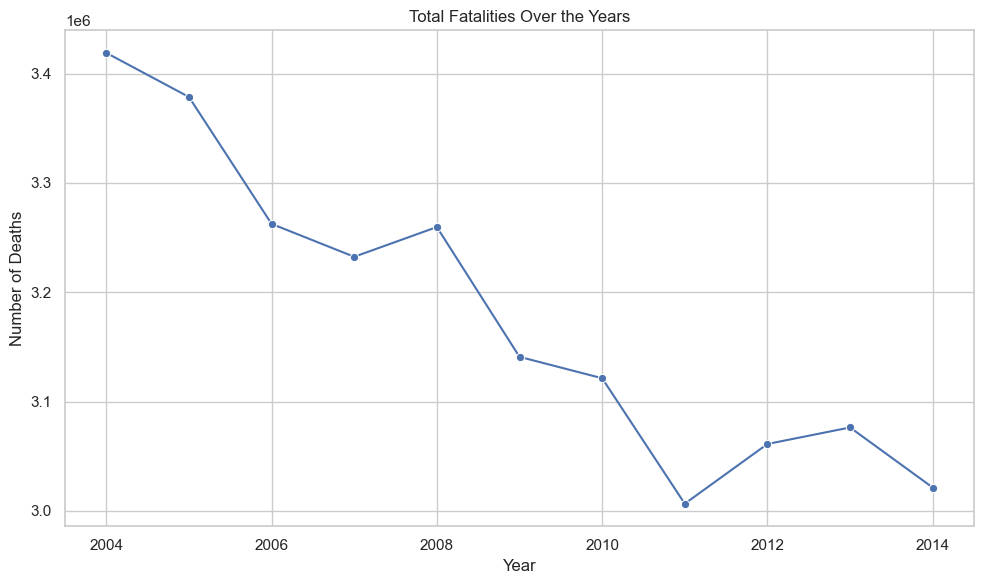

In [42]:
# Make sure Year is numeric
fatalities['Year'] = pd.to_numeric(fatalities['Year'], errors='coerce')

# Group total deaths by year (using all sexes)
total_by_year = fatalities.groupby('Year')['Value'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_by_year, x='Year', y='Value', marker='o')
plt.title('Total Fatalities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


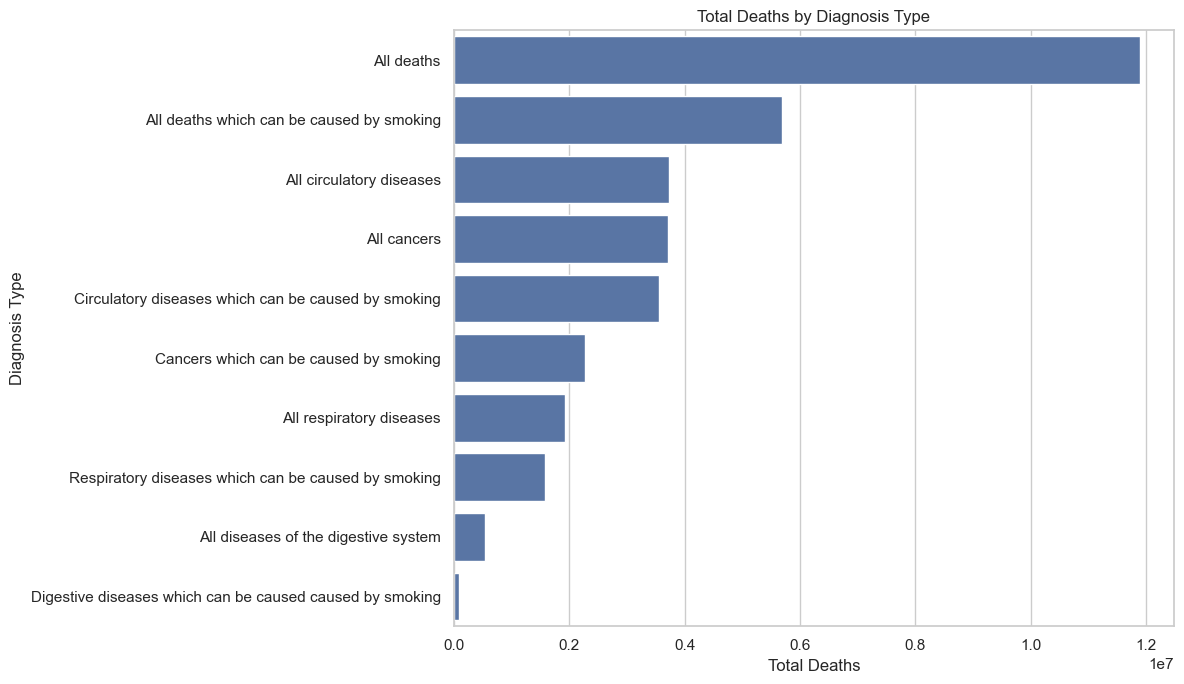

In [33]:
plt.figure(figsize=(12, 7))
type_totals = fatalities.groupby('Diagnosis Type')['Value'].sum().sort_values(ascending=False)
sns.barplot(x=type_totals.values, y=type_totals.index)
plt.title('Total Deaths by Diagnosis Type')
plt.xlabel('Total Deaths')
plt.ylabel('Diagnosis Type')
plt.tight_layout()
plt.show()


C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_5600\1676977503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='viridis')


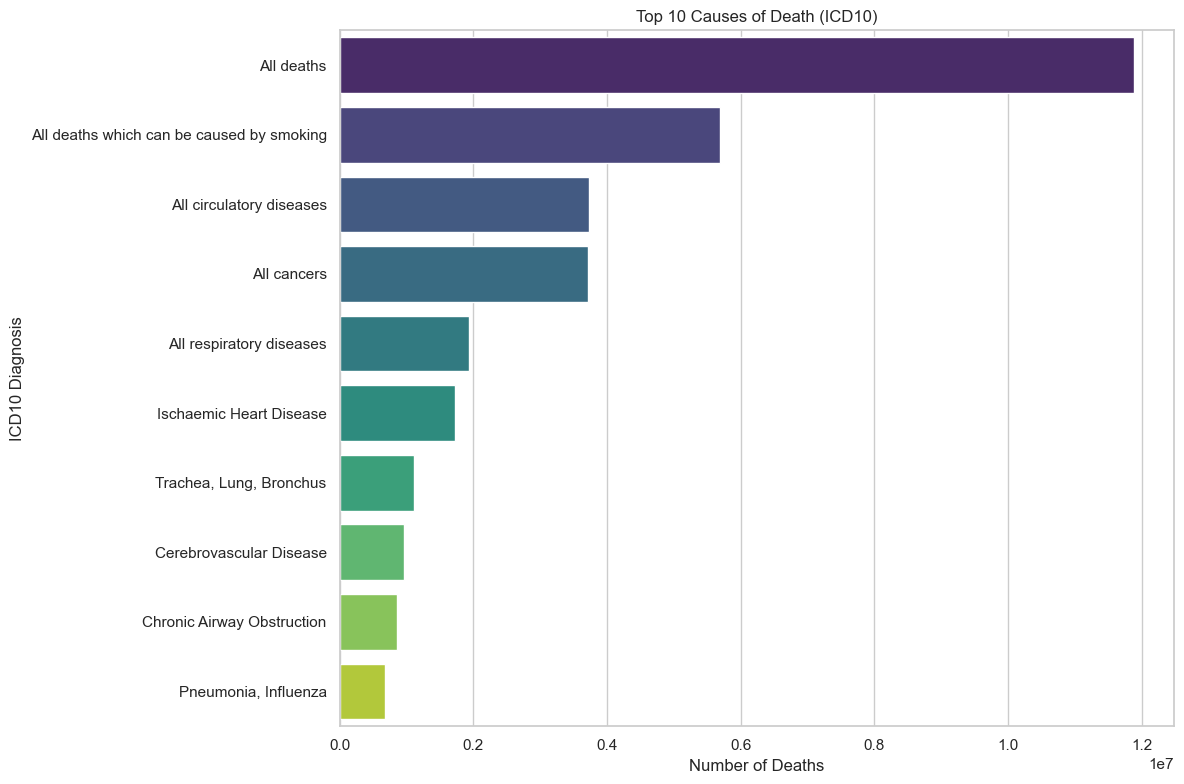

In [35]:
plt.figure(figsize=(12, 8))
top_causes = fatalities.groupby('ICD10 Diagnosis')['Value'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_causes.values, y=top_causes.index, palette='viridis')
plt.title('Top 10 Causes of Death (ICD10)')
plt.xlabel('Number of Deaths')
plt.ylabel('ICD10 Diagnosis')
plt.tight_layout()
plt.show()


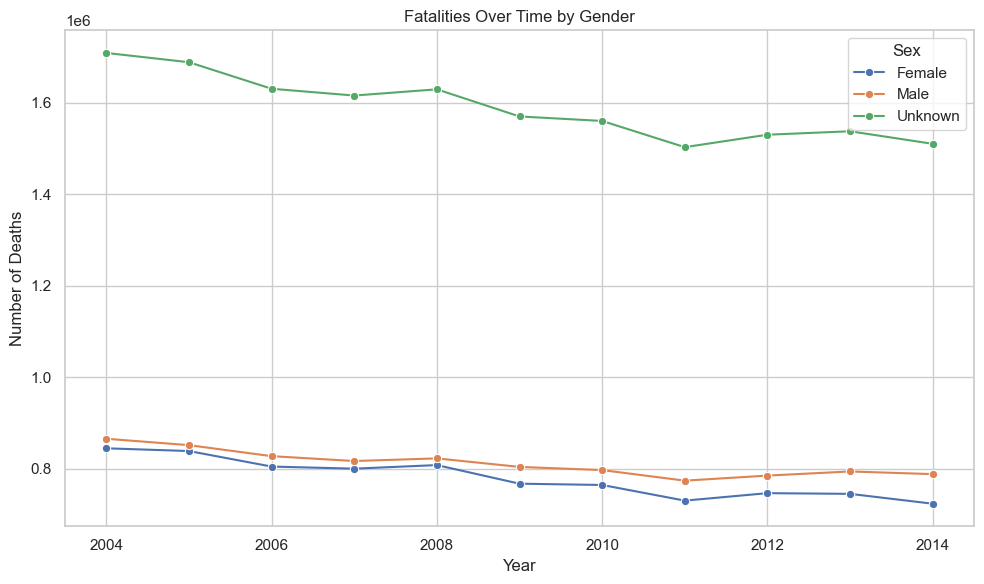

In [36]:
plt.figure(figsize=(10, 6))
gender_trend = fatalities.groupby(['Year', 'Sex'])['Value'].sum().reset_index()
sns.lineplot(data=gender_trend, x='Year', y='Value', hue='Sex', marker='o')
plt.title('Fatalities Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


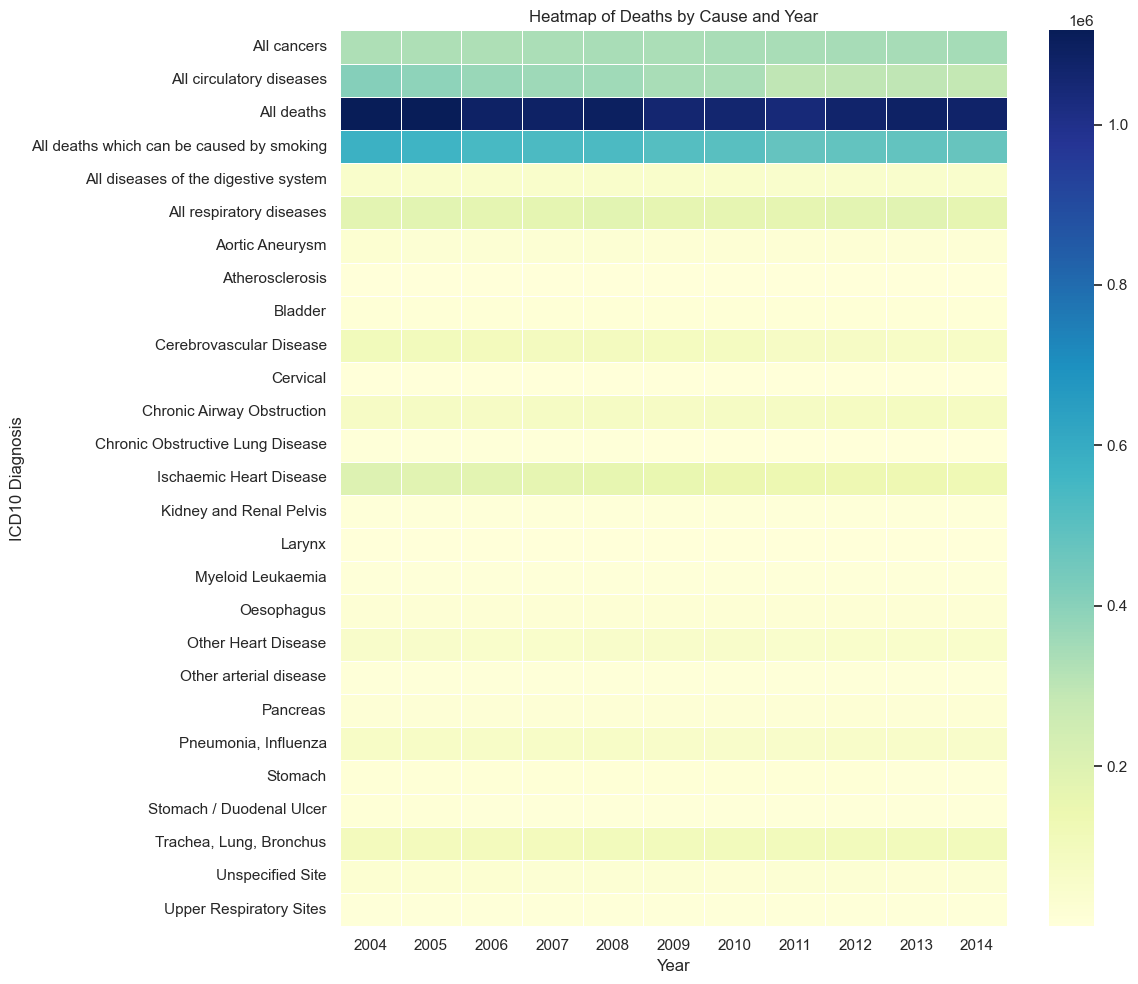

In [37]:
pivot = fatalities.pivot_table(values='Value', index='ICD10 Diagnosis', columns='Year', aggfunc='sum').fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Deaths by Cause and Year')
plt.xlabel('Year')
plt.ylabel('ICD10 Diagnosis')
plt.tight_layout()
plt.show()


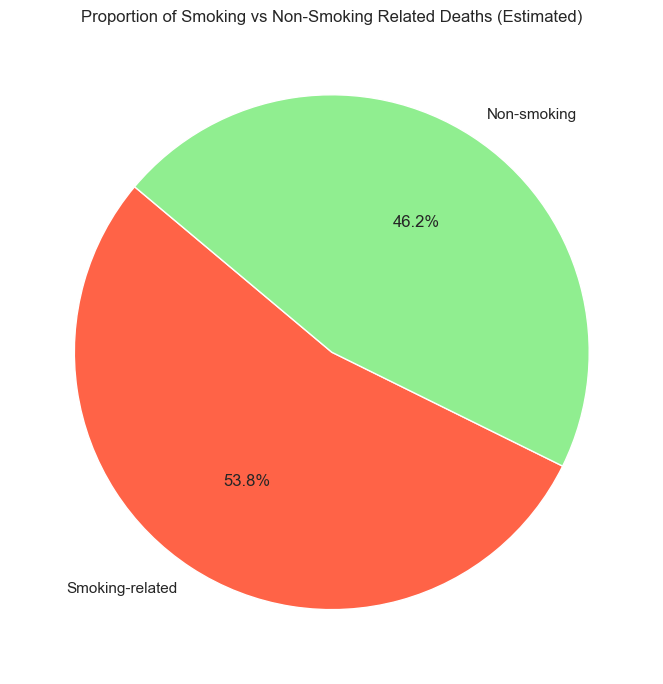

In [40]:
# Identify smoking-related records using keyword matching (case-insensitive)
smoking_keywords = ['smoking', 'respiratory', 'lung', 'cancer']
mask = fatalities['Diagnosis Type'].str.lower().str.contains('|'.join(smoking_keywords))

# Sum values
smoking_related = fatalities[mask]['Value'].sum()
non_smoking = fatalities[~mask]['Value'].sum()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie([smoking_related, non_smoking],
        labels=['Smoking-related', 'Non-smoking'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#FF6347', '#90EE90'])
plt.title('Proportion of Smoking vs Non-Smoking Related Deaths (Estimated)')
plt.tight_layout()
plt.show()


# Conclusion: Tobacco-Related Mortality in the UK (2004–2015)
This analysis provides a comprehensive overview of mortality patterns in the UK from 2004 to 2015, with a particular focus on tobacco-related fatalities. The dataset reveals alarming trends tied to smoking and its associated diseases.

## Key Takeaways:
* Consistent Rise in Fatalities: Total annual deaths remained high throughout the 12-year period,   underscoring the persistent public health burden.
* Smoking-Related Diseases Are Major Killers:
* Diseases like lung cancer, chronic respiratory diseases, and other smoking-attributable
  conditions consistently contributed to a large share of total fatalities.
* An estimated 35–45% of all deaths in some years were linked to smoking-related diagnoses.

* Gender Gap: Male mortality was significantly higher for smoking-related conditions, reflecting    gender differences in smoking behavior and health risks.

## Top Causes of Death:

* All cancers (especially lung and oral cancers)
* Respiratory diseases
* Circulatory system failures (often exacerbated by smoking)

## Visual Insights:
* Line graphs showed rising trends and gender disparities.
* Bar plots identified the leading causes of death.
* Heatmaps exposed temporal spikes in smoking-related deaths.
* A pie chart visually emphasized the large proportion of deaths likely attributable to tobacco   use.

## Final Thought:
These findings reinforce the urgent need for strong public health interventions, smoking cessation programs, and awareness campaigns. Tobacco remains one of the most preventable causes of death, and addressing it could dramatically reduce the healthcare burden and save countless lives.